Задача: Бинарная классификация

Датасет: Набор данных для анализа и прогнозирования сердечных заболеваний

ССылка: https://www.kaggle.com/datasets/bhadaneeraj/cardio-vascular-disease-detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

Данные в датасете:

In [2]:
not_clean = pd.read_csv("/content/cardio_train.csv") 
dataset = not_clean.iloc[:,0].apply(lambda x: pd.Series(str(x).split(";")))
dataset.columns = ["id","age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active",'cardio']
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [25]:
cols = ["id","age","gender","height","weight",
                "ap_hi","ap_lo","cholesterol","gluc",
                "smoke","alco","active",'cardio']
n_cols = ["age","height","weight",
                "ap_hi","ap_lo","cholesterol","gluc", "smoke","alco","active",'cardio']
for col in cols:
    dataset[col] = pd.to_numeric(dataset[col])

Размер датасета:

In [12]:
dataset.shape

(69301, 13)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 9.4 MB


In [16]:
dataset["age"] = [elem/365 for elem in dataset["age"]]

In [17]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,53.339140,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,6.759621,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,58.427397,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
dataset.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

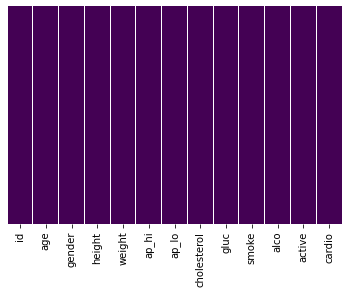

In [19]:
import seaborn as sns
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
dataset.drop_duplicates(inplace=True)

<Figure size 1152x432 with 0 Axes>

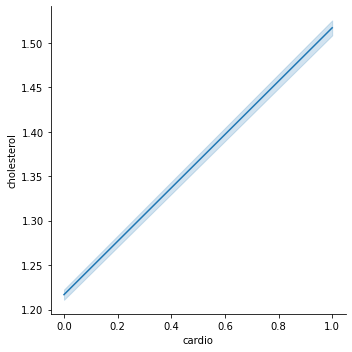

In [20]:
plt.figure(figsize=(16,6))
sns.relplot(x="cardio", y="cholesterol", kind="line", data=dataset);

In [ ]:
plt.figure(figsize=(16,6))
sns.relplot(x="cardio", y="ap_lo", kind="line", data=dataset);

In [21]:
def memory_analyse(df):
    for dtype in ['float','int','object']:
        selected_dtype = df.select_dtypes(include=[dtype])
        mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
        mean_usage_mb = mean_usage_b / 1024 ** 2
        print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

memory_analyse(dataset)

Average memory usage for float columns: 1.20 MB
Average memory usage for int columns: 0.70 MB
Average memory usage for object columns: 2.54 MB


In [23]:
unique_counts = pd.DataFrame.from_records([(col, dataset[col].dtype, dataset[col].nunique()) for col in dataset.columns],
                          columns=['Column_Name', 'Type', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Type,Num_Unique
2,gender,int64,2
9,smoke,int64,2
10,alco,int64,2
11,active,int64,2
12,cardio,int64,2
7,cholesterol,int64,3
8,gluc,int64,3
3,height,int64,108
5,ap_hi,int64,153
6,ap_lo,int64,157


In [24]:
def show_data(df):
    for col in df.columns:
        print("{0}: {1}".format(col, df[col].unique()))
    print(df.columns)
show_data(dataset) 

id: [  988   989   990 ... 99996 99998 99999]
age: [61.55890411 40.13150685 60.00273973 ... 40.89041096 48.56712329
 49.11232877]
gender: [1 2]
height: [155 163 165 164 162 161 157 158 153 169 150 176 154 159 146 167 170 151
 183 160 178 171 179 174 180 168 166 149 156 147 152 141 173 177 172 175
 148 144 185 181 195 140 182 198 186 145 187 143 196 138 184 142 194 190
 134 136 100 120 189 137 188 192 122 250 191 117  70  97 119 130 110 193
  75 132  71 135  67 125 139 133  74  98 112 207  68  55  81  80  64  91
  60 109  72 197  65 128 105 108 200 104 111 113  96 131  59  66  99  57]
weight: [ 69.    71.    70.    85.    62.    61.    72.    93.    68.    65.
  57.    82.    56.    60.    45.    90.    74.    88.    95.   103.
  80.    63.    55.    91.    77.    83.   113.   129.    81.    94.
  76.    96.   114.    79.    78.    73.    86.    58.    64.    87.
  75.    67.   124.   120.    84.    98.    51.   105.    42.   115.
  92.   116.    50.   100.   107.    59.    66.    49.  

Распределение значений для каждого признака

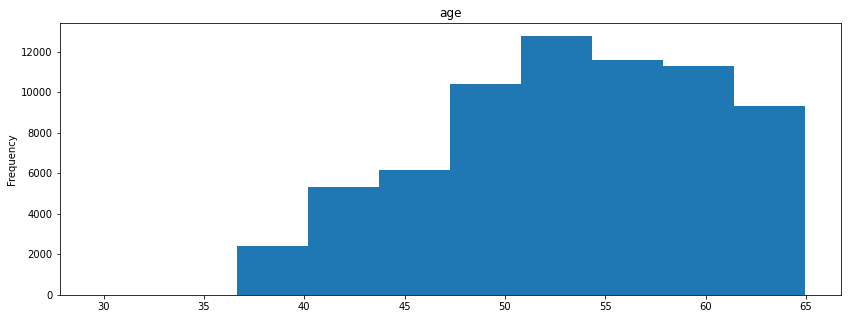

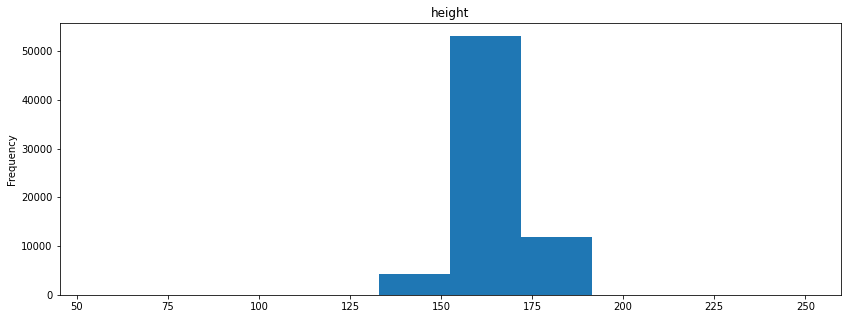

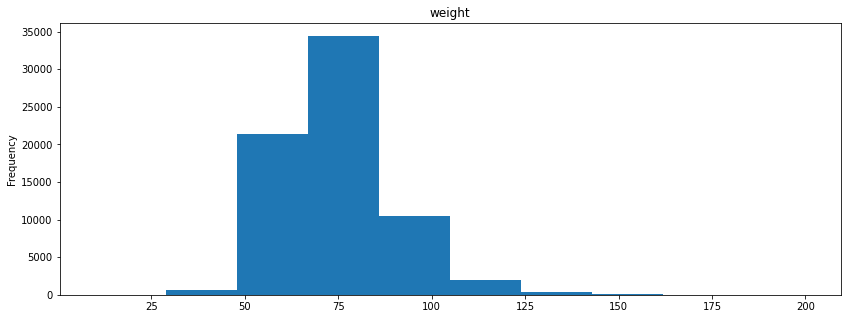

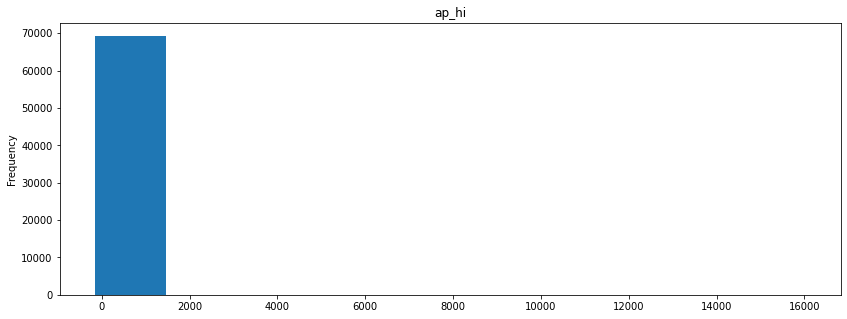

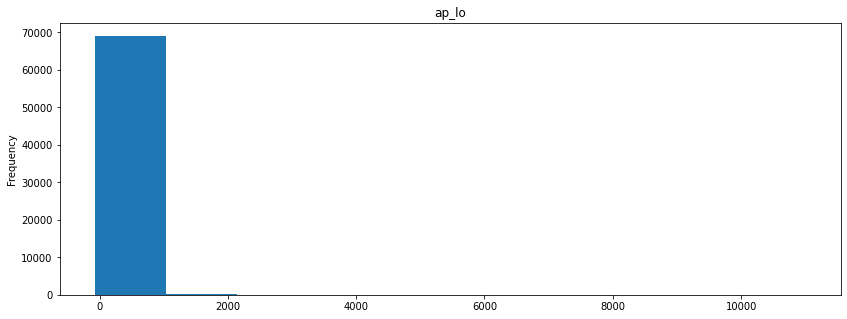

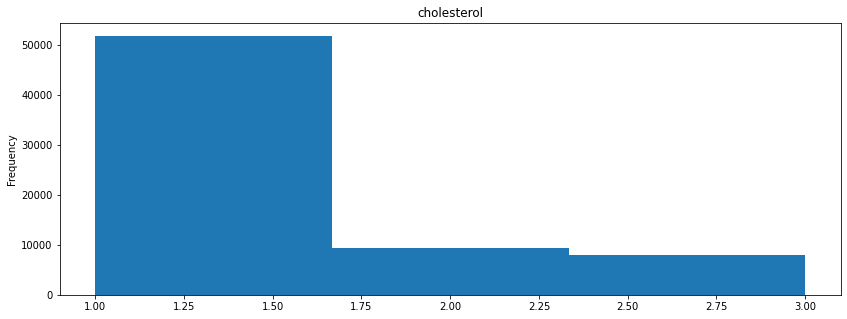

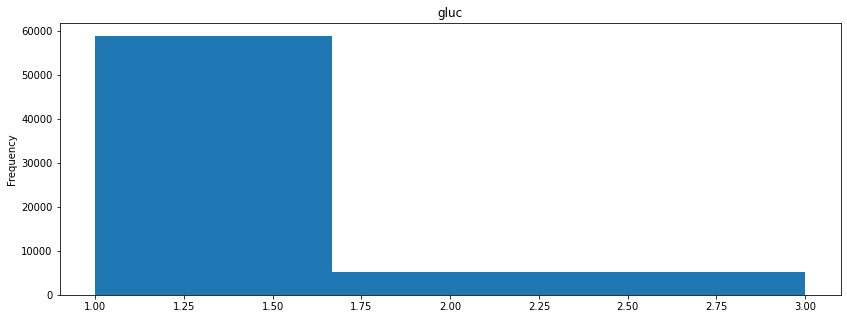

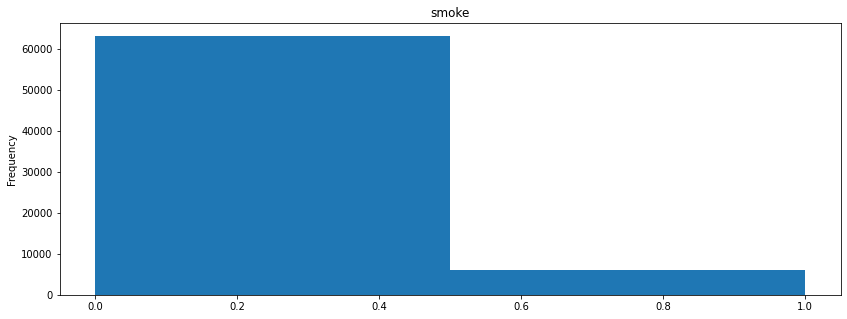

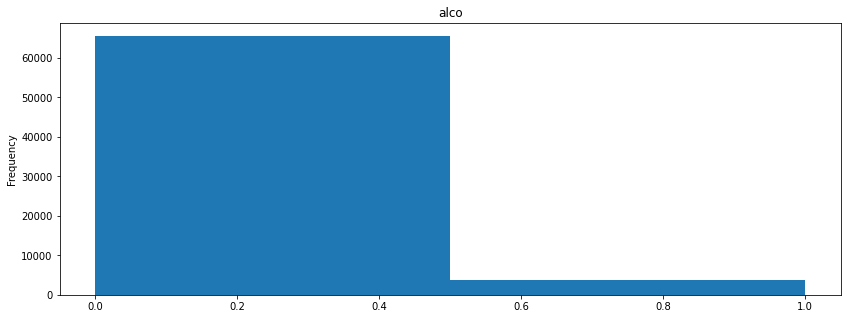

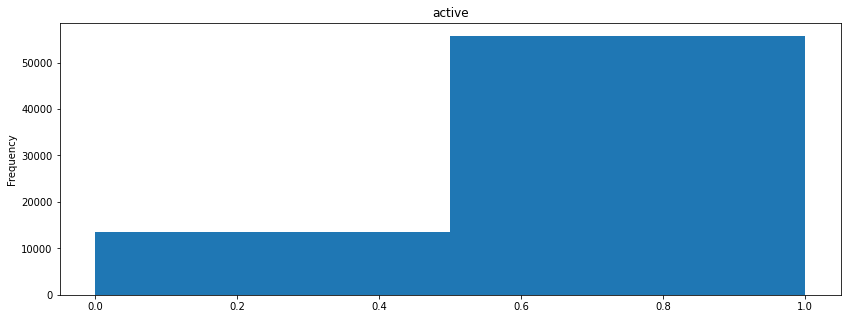

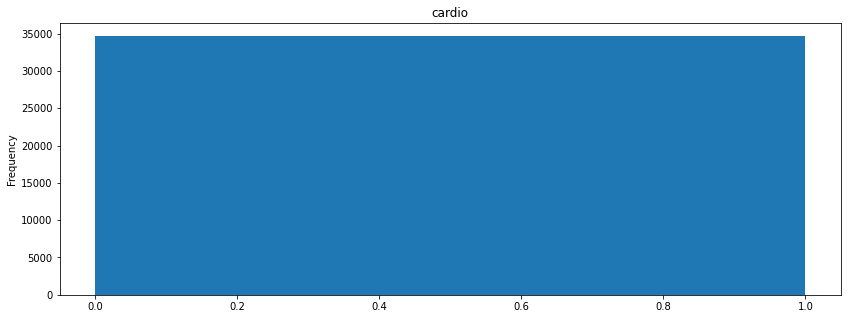

In [27]:
for col in n_cols:
    fig = plt.figure(figsize=(14,5))
    plt.title(col)
    if (col == 'alco' or col == 'active' or col == 'cardio' or col == 'smoke'): dataset[col].plot.hist(bins=2)
    elif (col == 'cholesterol' or col == 'gluc'): dataset[col].plot.hist(bins=3)
    else: dataset[col].plot.hist(bins=10)

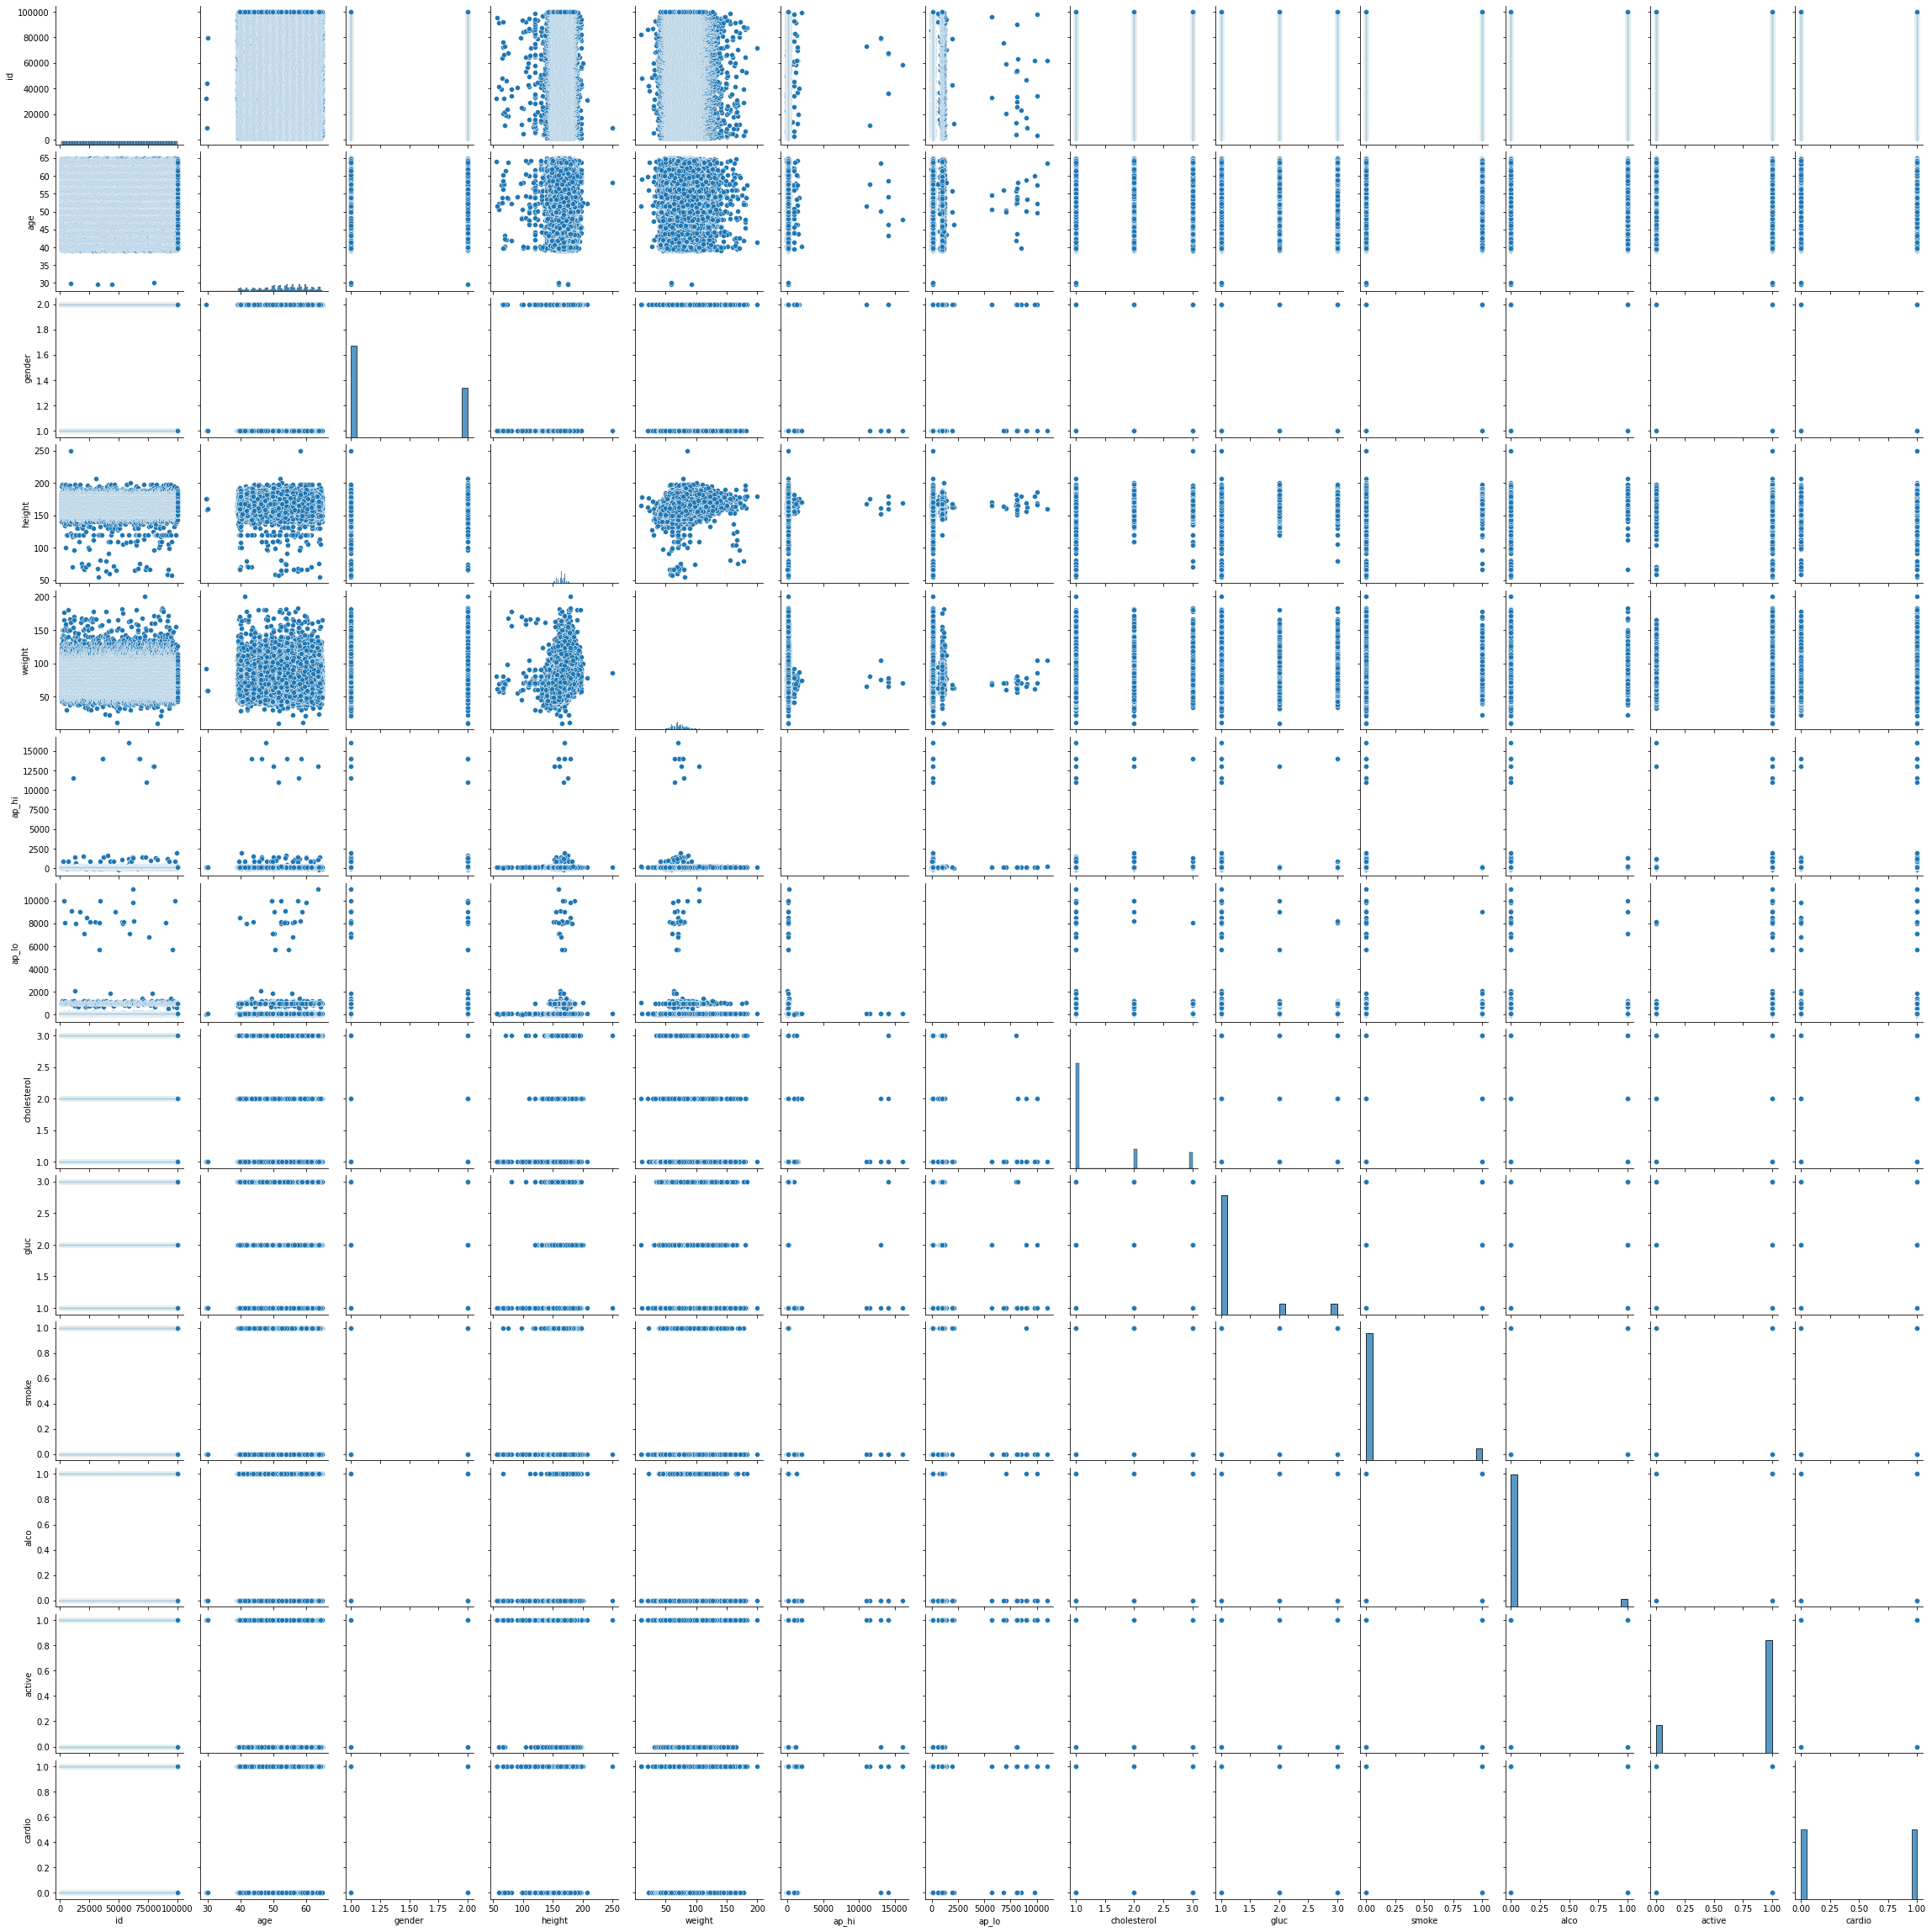

In [28]:
sns_plot = sns.pairplot(dataset[cols].dropna())

In [29]:
dataset.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


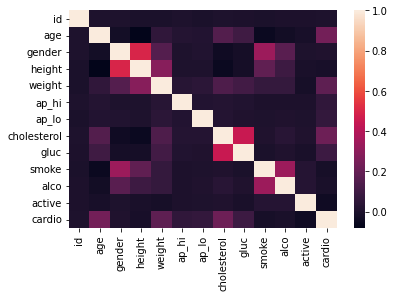

In [30]:
sns.heatmap(dataset.corr())

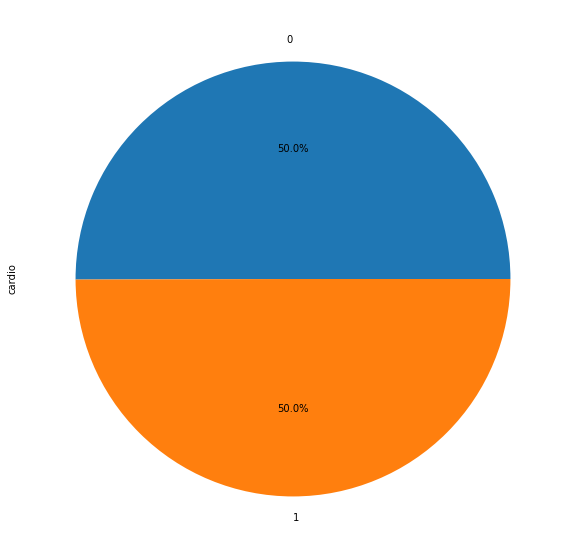

In [31]:
plt.show(dataset['cardio'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10)))

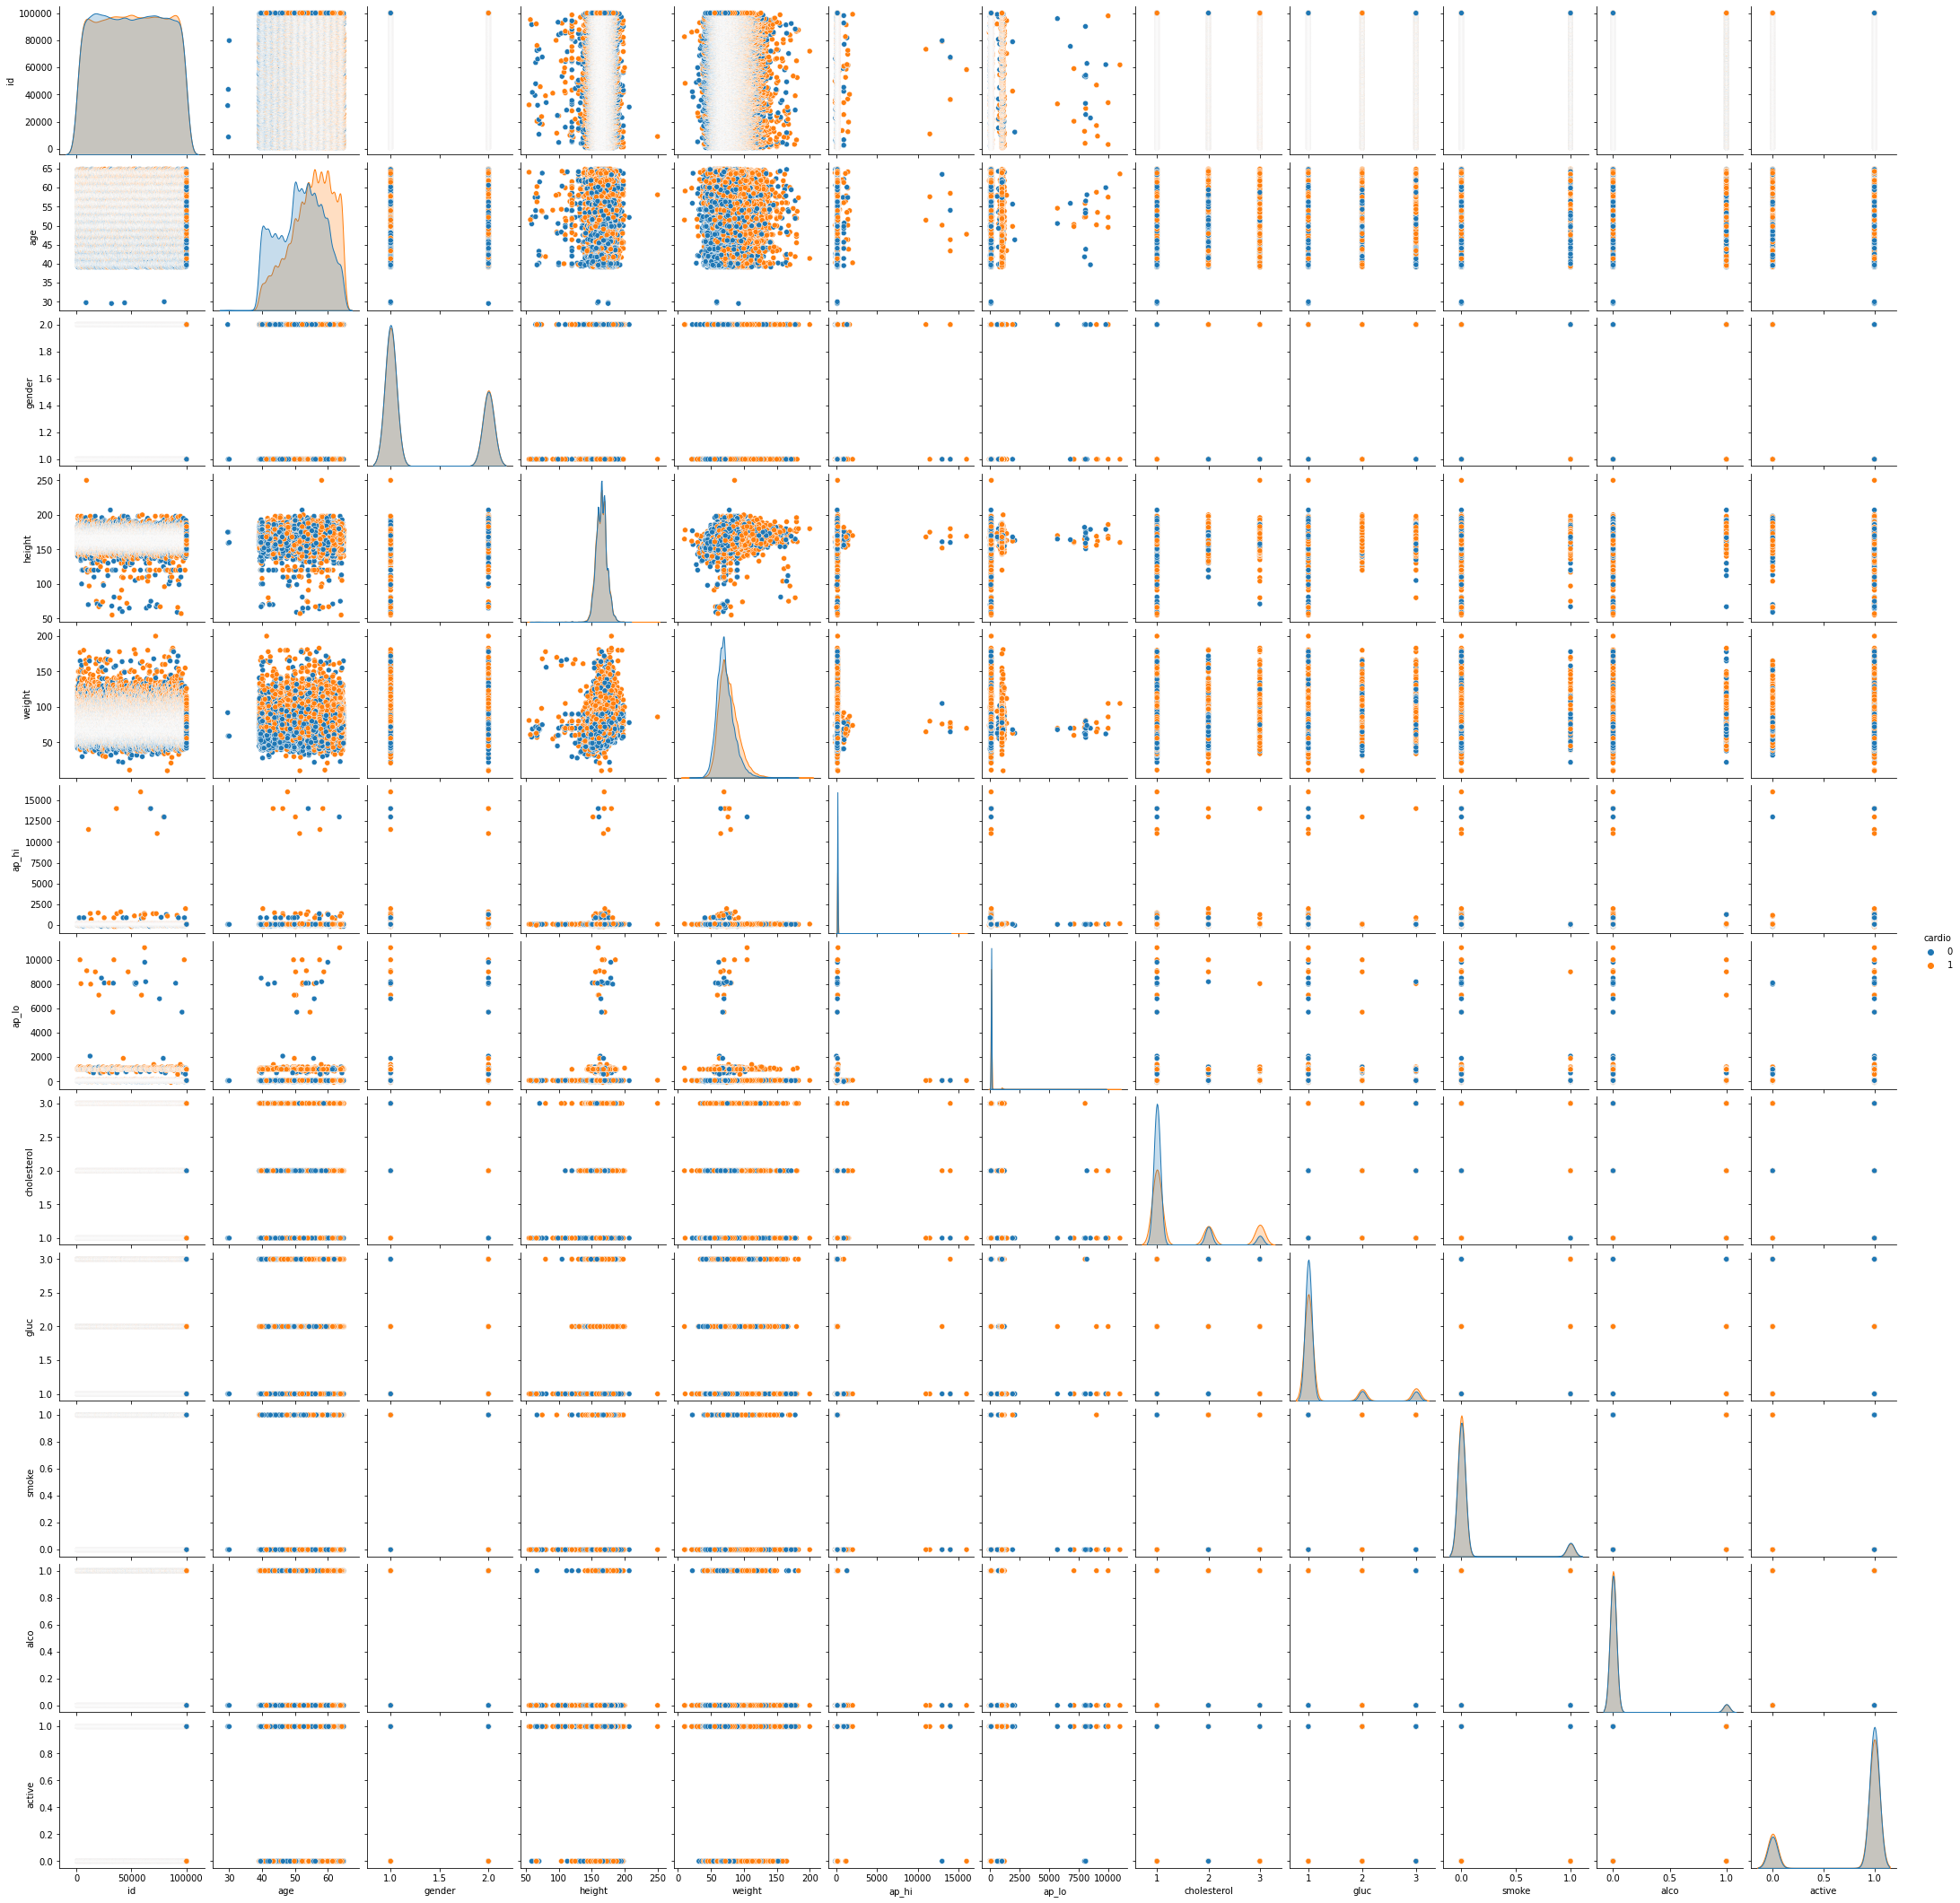

In [32]:
sns.pairplot(dataset, hue='cardio')